### libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data extraction from the csv file:


In [14]:
df = pd.read_csv('DistMod.csv')
zcmb = df['zcmb']
mb = df['mb'] #apparent magnitude
dmb = df['dmb'] #apparent magnitude error

### input values 

In [15]:
H0 = 70
q0 = 0 
M = -19.27

### define curve

In [16]:
def curve(q0, H0, z):
    m = M + 43.23-5*np.log10(H0 / 68) + 5*np.log10(z) + 1.086*(1-q0)*z
    return m

### scatter plot:

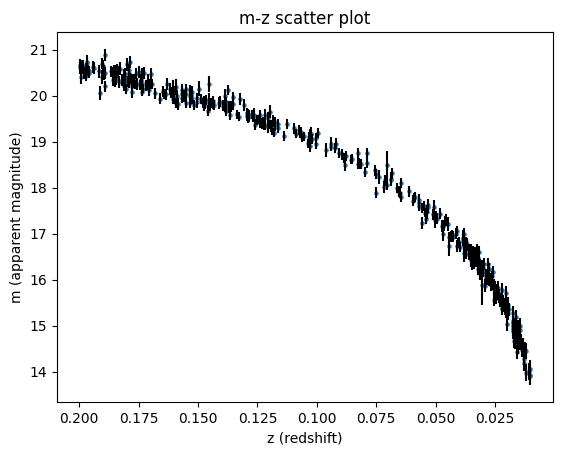

In [17]:
plt.scatter(zcmb , mb , s = 5)
plt.title("m-z scatter plot")
plt.ylabel("m (apparent magnitude)")
plt.xlabel("z (redshift)")
plt.gca().invert_xaxis()
plt.errorbar(zcmb, mb,yerr = dmb, fmt='none',ecolor = 'black',color='yellow') 
plt.show()

fit 1:
H0 = 0
q0 = 0

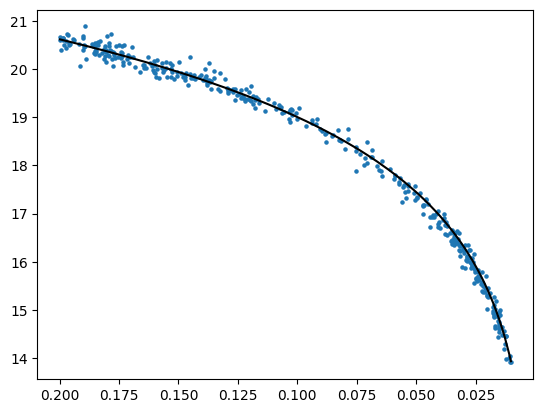

In [18]:
q0 = 0
H0 = 70
plt.scatter(zcmb , mb , s = 5)
x_curve = zcmb
y_curve = curve(q0,H0,zcmb)
plt.gca().invert_xaxis()
plt.plot(x_curve,y_curve,color = 'black')
plt.show()

# A)
### with trial and error we can find out that:
## -1<q0<1

and 

## 65<H0<75

In [19]:
def penalty(m , z , H0, q0):
    chi = m - curve(q0 , H0, z)
    return (chi)**2

## phase space

[[153.53269751 150.02422276 146.57107515 ...  11.49599078  11.62286029
   11.77421966]
 [151.31011663 147.82668929 144.39850519 ...  11.37937155  11.52512979
   11.69533013]
 [149.10824127 145.64986134 142.24664075 ...  11.28345783  11.4481048
   11.63714611]
 ...
 [ 34.34723406  33.26835847  32.23667065 ...  96.58880731  98.54788331
  100.52681652]
 [ 34.13308822  33.07926004  32.07253572 ...  98.48062312 100.45858784
  102.45636202]
 [ 33.93964789  32.91086713  31.92910631 ... 100.39314444 102.38999789
  104.40661304]]


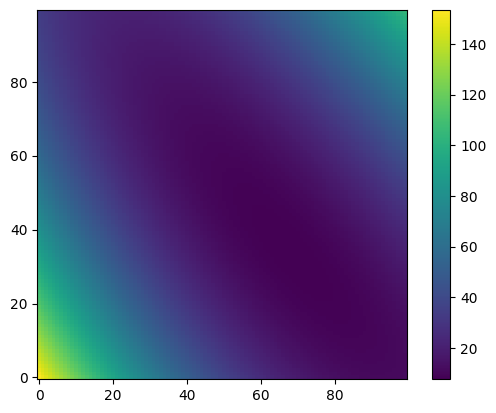

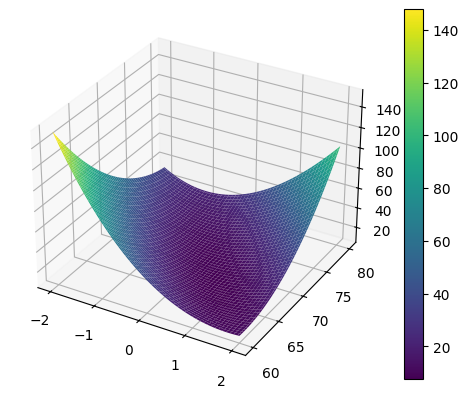

In [29]:
# Create x and y values
q0_ax = np.linspace(-2, 2, 100)
H0_ax = np.linspace(60, 80, 100)

chi2_array = np.empty((100,100))
for i in range(0 ,100):
   for j in range(0 ,100):
        q = q0_ax[i]
        h = H0_ax[j]
        total = 0
        for k in range(0,len(mb)):
            total += penalty(mb[k],zcmb[k],h,q)
        chi2_array[i][j] = total

plt.imshow(chi2_array , origin = 'lower')
plt.colorbar()
plt.show()


X, Y = np.meshgrid(q0_ax, H0_ax)
Z = chi2_array
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf)
plt.show()



# MCMC:

In [47]:
import random
#find random starting point in phase space 
point_q = random.randint(0, len(q0_ax) - 1)
point_h = random.randint(0, len(H0_ax) - 1)

nmcmc = 100
q_step = 10
h_step = 10
chi2_1 = chi2_array[point_q,point_h]
for i in range(0,nmcmc):
    w = 1
    new_q = int(point_q+q_step)
    new_h = int(point_h+h_step)
    
    chi2_2 = chi2_array[new_q,new_h]
    r = random.random()
    if i < nmcmc:
        if r < np.exp(chi2_1 - chi2_2):
            chi2_2 = chi2_1 
            new_q = point_q
            new_h = point_h
        else : w += 1
    else: break


    point_q += q_step
    point_h += h_step





IndexError: index 102 is out of bounds for axis 0 with size 100